In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np
df = pd.read_csv("Spectrum_Loc1_session1_group1_2025-04-11_16-51-13 (1).csv")

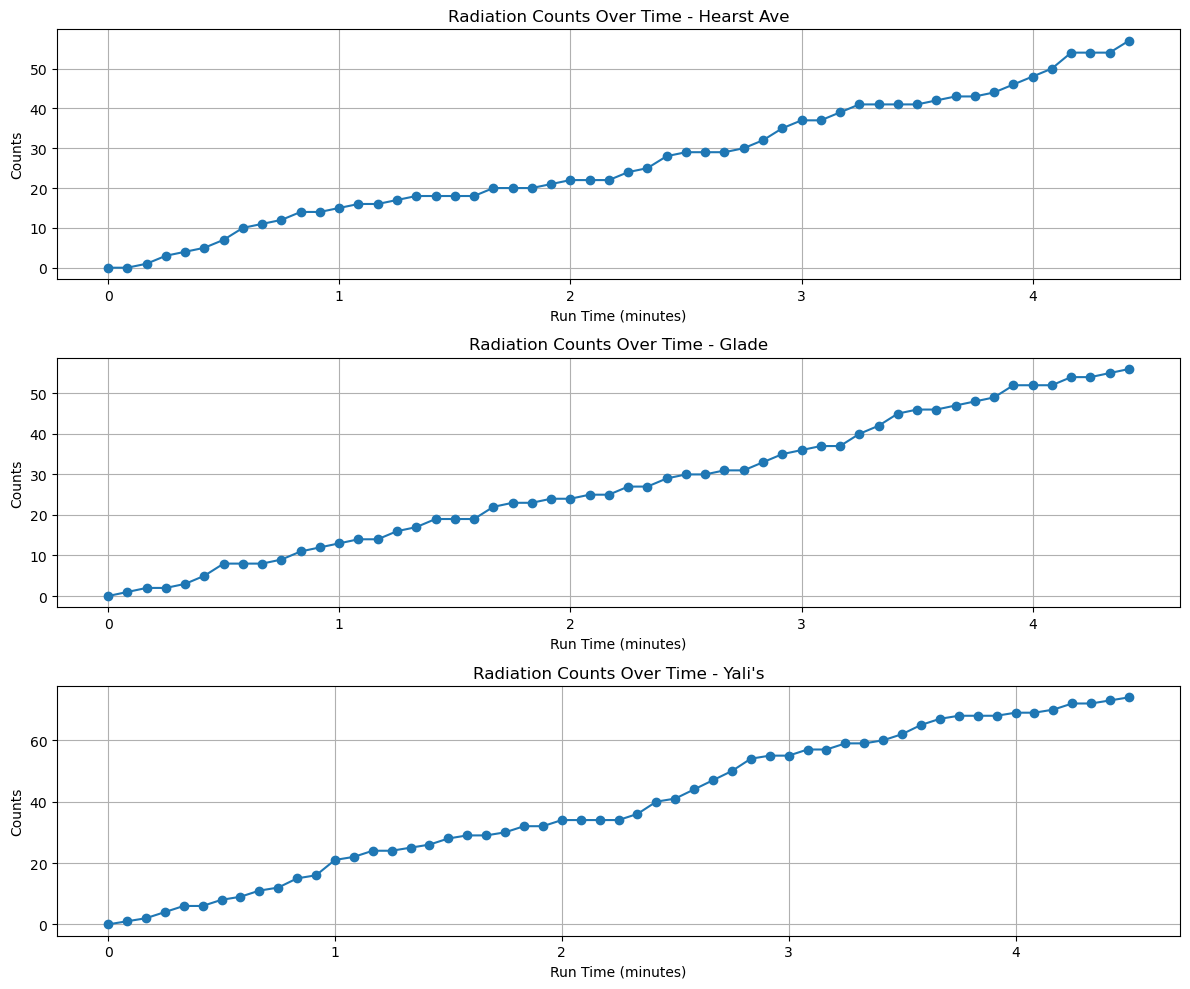

In [64]:
#A
# Couldnt get temperature and 2.5 PM concentration sensors to work so only able to do
# the radiation data. Also couldn't get location to work so had to split manually. 
df['Total_Counts'] = df['1023']

locations = {
    "Hearst Ave": df.iloc[0:54].copy(),
    "Glade": df.iloc[54:108].copy(),
    "Yali's": df.iloc[108:163].copy()}

for loc_data in locations.values():
    loc_data['Minutes'] = [i * 5 / 60 for i in range(len(loc_data))]
    loc_data['Counts'] = loc_data['Total_Counts'] - loc_data['Total_Counts'].iloc[0]

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=False)
for ax, (location, data) in zip(axes, locations.items()):
    ax.plot(data['Minutes'], data['Counts'], marker='o', linestyle='-')
    ax.set_title(f"Radiation Counts Over Time - {location}")
    ax.set_xlabel("Run Time (minutes)")
    ax.set_ylabel("Counts")
    ax.grid()

plt.tight_layout()
plt.show()

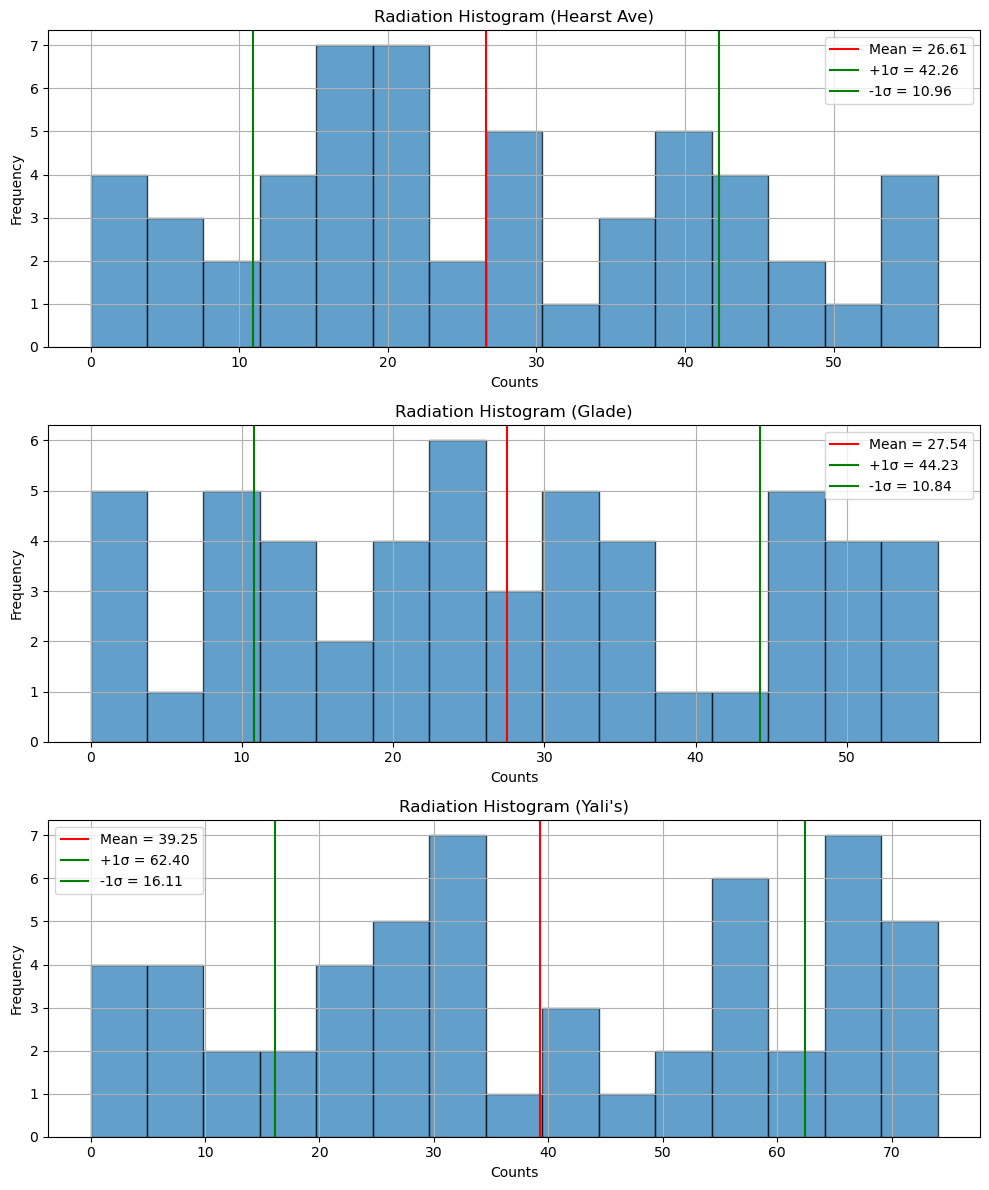

In [65]:
#B
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for ax, (location, data) in zip(axes, locations.items()):
    counts = data['Total_Counts'] - data['Total_Counts'].iloc[0]
    mean_rel = counts.mean()
    std_rel = counts.std()

    ax.hist(counts, bins=15, edgecolor='black', alpha=0.7)
    ax.axvline(mean_rel, color='red', label=f'Mean = {mean_rel:.2f}')
    ax.axvline(mean_rel + std_rel, color='green', label=f'+1σ = {mean_rel + std_rel:.2f}')
    ax.axvline(mean_rel - std_rel, color='green', label=f'-1σ = {mean_rel - std_rel:.2f}')
    ax.set_title(f"Radiation Histogram ({location})")
    ax.set_xlabel("Counts")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

In [66]:
#C
for location, data in locations.items():
    counts = data['Total_Counts'] - data['Total_Counts'].iloc[0]

    mean_rel = counts.mean()
    expected_std = np.sqrt(mean_rel)
    measured_std = counts.std()

    print(location)
    print("Mean of counts:", mean_rel)
    print("Expected σ:", expected_std)
    print("Measured σ:", measured_std)

Hearst Ave
Mean of counts: 26.61111111111111
Expected σ: 5.158595846847387
Measured σ: 15.653580778689859
Glade
Mean of counts: 27.537037037037038
Expected σ: 5.247574395569542
Measured σ: 16.69675481175565
Yali's
Mean of counts: 39.25454545454546
Expected σ: 6.265344799334308
Measured σ: 23.143048057692692


In [67]:
#D
for location, data in locations.items():
    counts = data['Total_Counts'] - data['Total_Counts'].iloc[0]
    
    measured_std = counts.std()
    N = len(counts)
    uncertainty_sigma = measured_std / np.sqrt(2 * N)

    print(location)
    print("Measured σ:", measured_std)
    print("Uncertainty on σ from CLT: +-", uncertainty_sigma)

Hearst Ave
Measured σ: 15.653580778689859
Uncertainty on σ from CLT: +- 1.506266512726357
Glade
Measured σ: 16.69675481175565
Uncertainty on σ from CLT: +- 1.6066459808600506
Yali's
Measured σ: 23.143048057692692
Uncertainty on σ from CLT: +- 2.206603052412285


In [68]:
#E
# Yes, the measured variation in radiation counts was significantly greater than the expected
# variation from simple counting statistics. This suggests that additional sources of radiation
# or environmental factors, such as changes in location or shielding, contributed to the observed data.

In [69]:
#F
# The mean radiation counts at each location differ by amounts much larger than their
# uncertainties, indicating statistically significant differences between locations. However, 
# these differences remain small in absolute terms and would not result in meaningful differences
# in radiation dose that could impact human health.